# Wine Segmentation Using Clustering

## Problem Statement
With the vast variety of wines available worldwide, it is challenging to manually categorize wines into meaningful segments. This lack of clear segmentation can make it difficult for retailers, wineries, and consumers to make informed decisions about which wines to stock, produce, or purchase. For example, a wine enthusiast may want to explore similar wines based on a particular taste profile or characteristic, while a retailer might want to create different pricing and marketing strategies for various wine segments.

## Goal
The goal of this project is to leverage unsupervised learning techniques to identify distinct clusters of wines based on their attributes such as price, grape variety, ABV (Alcohol by Volume), and style. By understanding these clusters, we can:
- **Create Wine Segments:** Group wines into clusters with similar characteristics.
- **Draw Insights:** Identify the defining features of each cluster and understand what makes them unique.
- **Market Strategies:** Provide actionable insights for wineries and retailers to position and market wines effectively.

## Methods and Models
The project uses the following unsupervised learning methods and models:
1. **Principal Component Analysis (PCA):** Dimensionality reduction technique to reduce the feature space and visualize the data in 2D.
2. **K-means Clustering:** A partition-based clustering method that groups wines into distinct clusters based on their attributes.
3. **Hierarchical Clustering:** A hierarchical method to provide an alternative clustering view and understand the relationships between wines using a dendrogram.

### Steps:
1. **Data Preprocessing:** Handle missing values, encode categorical variables, and normalize numerical features.
2. **Dimensionality Reduction:** Apply PCA to visualize the data and understand its variance.
3. **Clustering:** Use K-means and hierarchical clustering to identify clusters.
4. **Cluster Analysis:** Analyze the characteristics of each cluster to gain insights.

## Dataset
We are using the [Wine Dataset](https://www.kaggle.com/datasets/elvinrustam/wine-dataset) provided by Elvin Rustamov on Kaggle. This dataset contains a subset of wines from around the world with features such as:
- **Title:** The name or title of the wine.
- **Description:** A brief description of the wine.
- **Price:** The cost of the wine.
- **Capacity:** The volume or size of the wine bottle.
- **Grape:** The primary grape variety used in making the wine.
- **Secondary Grape Varieties:** Additional grape varieties used in the wine blend.
- **Closure:** The type of closure used for the bottle.
- **Country:** The country where the wine is produced.
- **ABV:** The percentage of alcohol content in the wine.
- **Region:** The region where the grapes used to make the wine are grown.
- **Style:** The overall sensory experience and characteristics of the wine.
- **Vintage:** The year the grapes used to make the wine were harvested.

## Expected Outcomes
By the end of the project, we aim to have identified distinct clusters of wines with similar characteristics. These clusters will provide insights that can be used for:
- Tailoring marketing strategies for different wine segments.
- Providing recommendations to consumers based on wine attributes.
- Helping retailers and producers position their products effectively in the market.

## Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set up Seaborn styling
sns.set_theme(style="whitegrid")  # You can choose other styles like "darkgrid", "white", or "ticks"
sns.set_palette("deep")  # You can choose other palettes like "muted", "pastel", "bright", etc.
sns.set_context("notebook", font_scale=1.2)  # Adjust font scale if needed

# Set up Matplotlib for inline plotting in Jupyter
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)  # Set default figure size

## Step 1: Load the Dataset

In [1]:
# Load the dataset
file_path = 'WineDataset.csv'
wine_df = pd.read_csv(file_path)

# Display basic information about the dataset
print(wine_df.info())

# Display summary statistics for numerical columns
print(wine_df.describe())

# Check for missing values
missing_data = (wine_df.isnull().sum() / len(wine_df)) * 100
print("\nMissing Data Percentage:")
print(missing_data.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

### Step 2: Exploratory Data Analysis (EDA)

Now, we will perform basic exploratory data analysis to understand the dataset. We'll check for missing values, analyze the data types, and look at the distribution of important features.


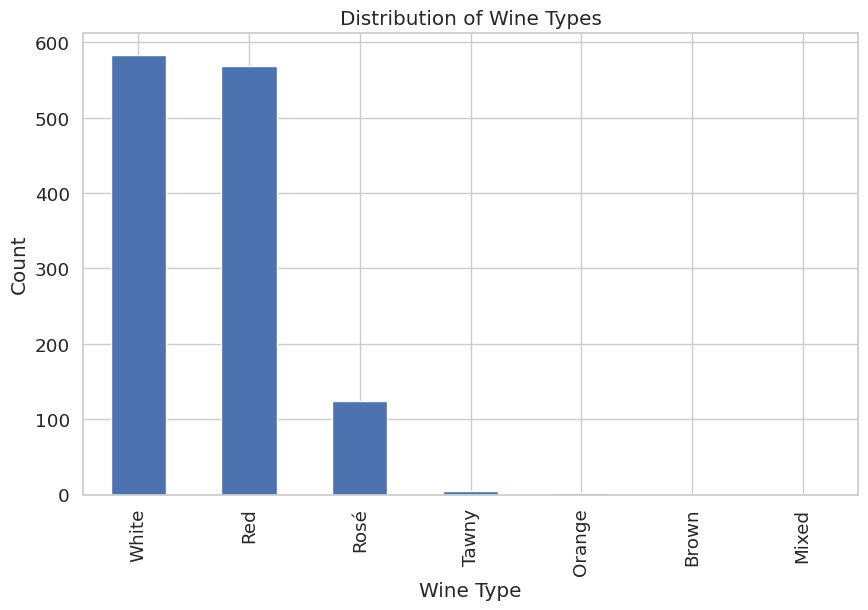

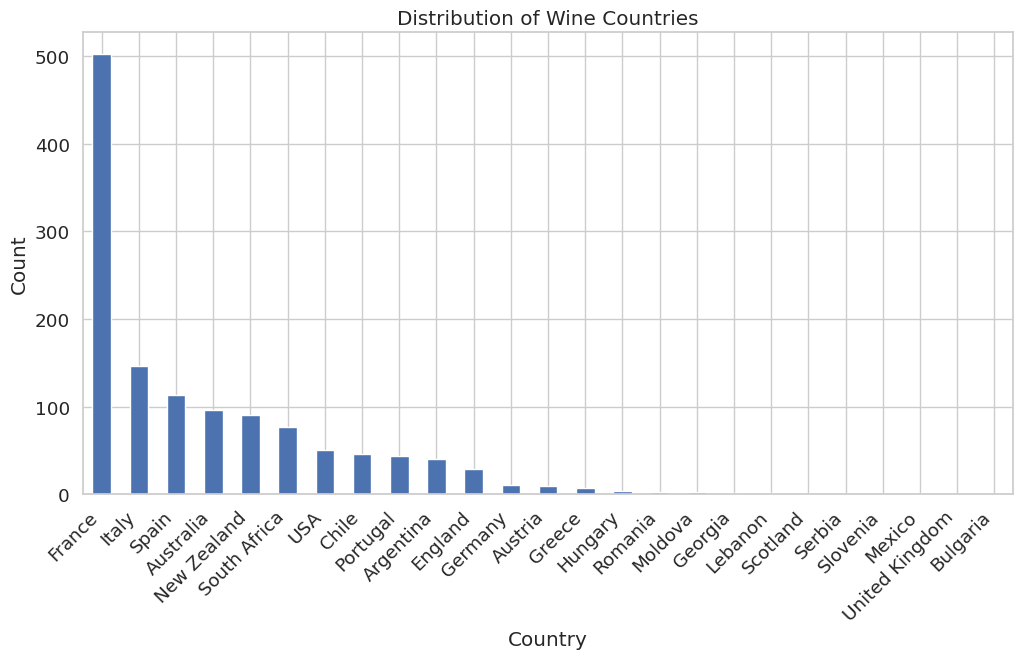

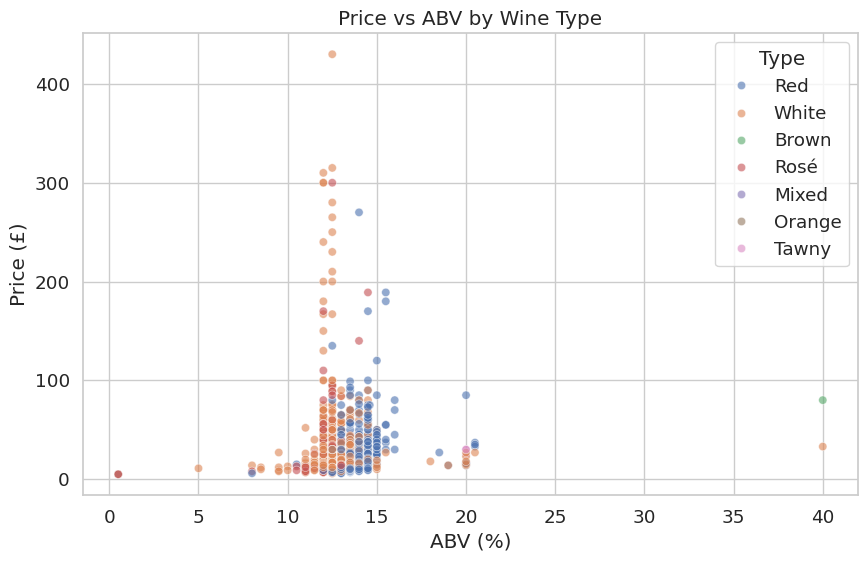

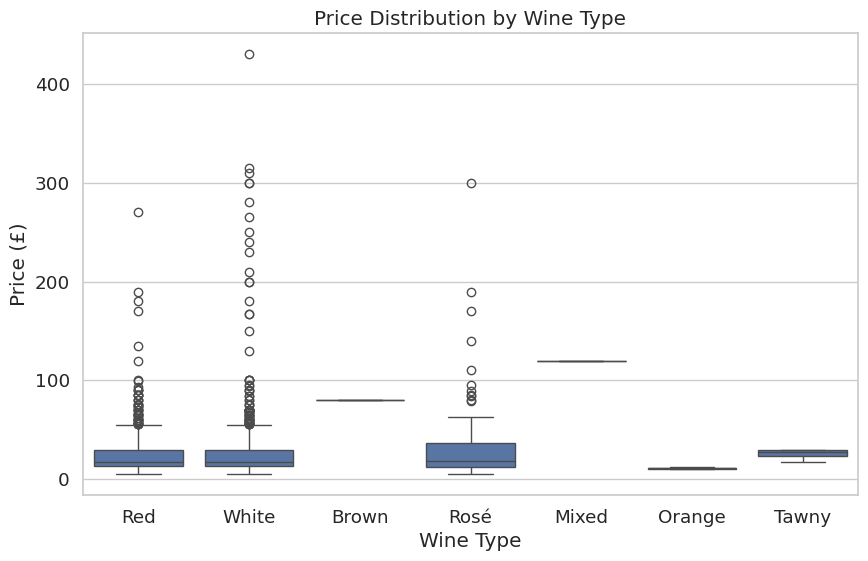

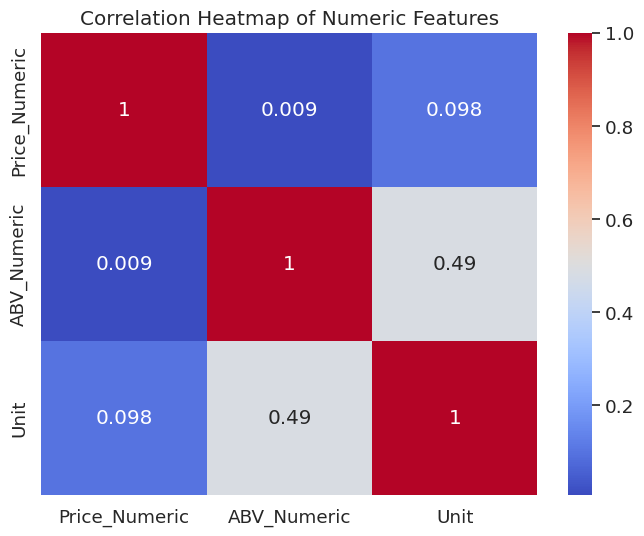

In [3]:
# Distribution of wine types
plt.figure(figsize=(10, 6))
wine_df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()

# Distribution of countries
plt.figure(figsize=(12, 6))
wine_df['Country'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Extract numeric price and ABV
wine_df['Price_Numeric'] = wine_df['Price'].str.extract('(\d+\.?\d*)').astype(float)
wine_df['ABV_Numeric'] = wine_df['ABV'].str.extract('(\d+\.?\d*)').astype(float)

# Scatter plot of Price vs ABV
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_df, x='ABV_Numeric', y='Price_Numeric', hue='Type', alpha=0.6)
plt.title('Price vs ABV by Wine Type')
plt.xlabel('ABV (%)')
plt.ylabel('Price (£)')
plt.show()

# Boxplot of Price by Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=wine_df, x='Type', y='Price_Numeric')
plt.title('Price Distribution by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Price (£)')
plt.show()

# Correlation heatmap
numeric_cols = ['Price_Numeric', 'ABV_Numeric', 'Unit']
correlation_matrix = wine_df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Step 3: Data Preprocessing

In this step, we will:
1. Handle missing values by either filling or dropping them.
2. Encode categorical variables.
3. Normalize numerical features to ensure the clustering algorithm performs optimally.


In [4]:
# Handle missing values
wine_df = wine_df.dropna()

# Select features for clustering
features = ['Price_Numeric', 'ABV_Numeric', 'Unit']

# Encode categorical variables
categorical_features = ['Grape', 'Country', 'Type', 'Style']
le = LabelEncoder()
for feature in categorical_features:
    wine_df[feature + '_Encoded'] = le.fit_transform(wine_df[feature])
    features.append(feature + '_Encoded')

# Normalize numerical features
scaler = StandardScaler()
wine_df_scaled = pd.DataFrame(scaler.fit_transform(wine_df[features]), columns=features)

print(wine_df_scaled.head())

   Price_Numeric  ABV_Numeric      Unit  Grape_Encoded  Country_Encoded  \
0      -0.192055    -0.930476 -0.361430      -0.711228        -0.420548   
1      -0.433721    -0.930476 -0.361430      -0.711228        -0.420548   
2      -0.157531    -0.363755 -0.262313      -0.141079        -0.420548   
3      -0.364674    -0.930476 -0.361430      -0.141079        -0.420548   
4      -0.502769    -0.930476 -0.361430      -0.141079        -0.420548   

   Type_Encoded  Style_Encoded  
0      1.084084      -0.862783  
1      1.084084      -0.862783  
2      1.084084      -0.862783  
3      1.084084      -0.862783  
4      1.084084      -0.862783  


### Step 4: Dimensionality Reduction Using PCA

To reduce the dimensionality of the dataset and visualize the clusters, we'll use PCA (Principal Component Analysis). This will help us reduce the number of features while retaining most of the variance in the data.


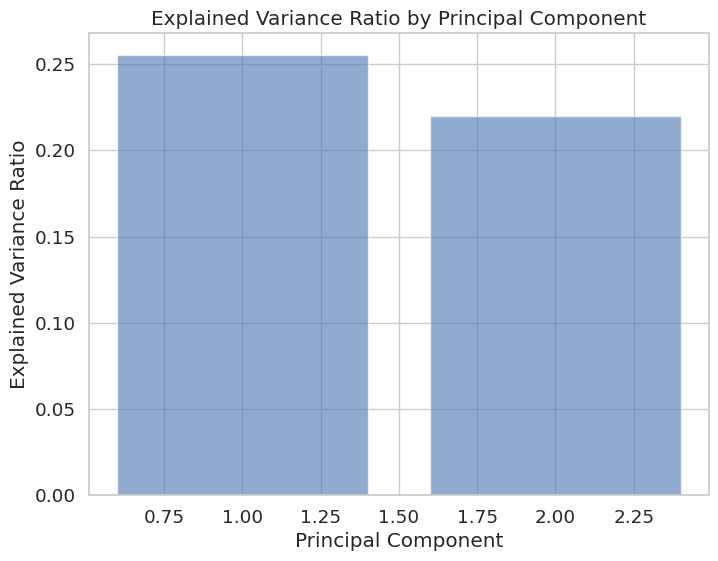

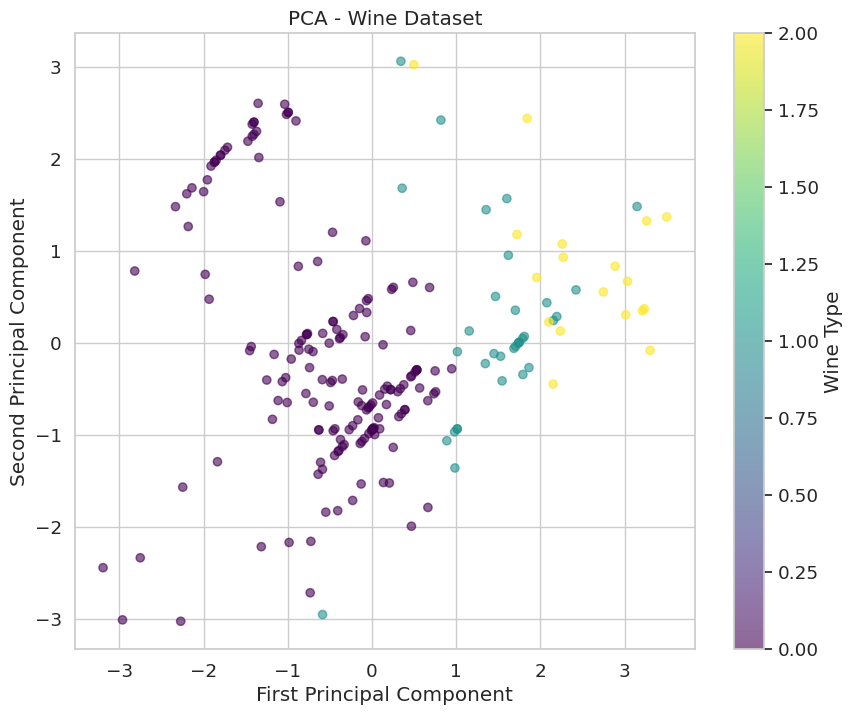

In [5]:
# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(wine_df_scaled)

# Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Scatter plot of PCA components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=wine_df['Type_Encoded'], cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Wine Dataset')
plt.colorbar(scatter, label='Wine Type')
plt.show()

### Step 5: K-means Clustering

Next, we'll use K-means clustering to group the wines into distinct clusters. We’ll use the Elbow method and Silhouette Score to determine the optimal number of clusters.


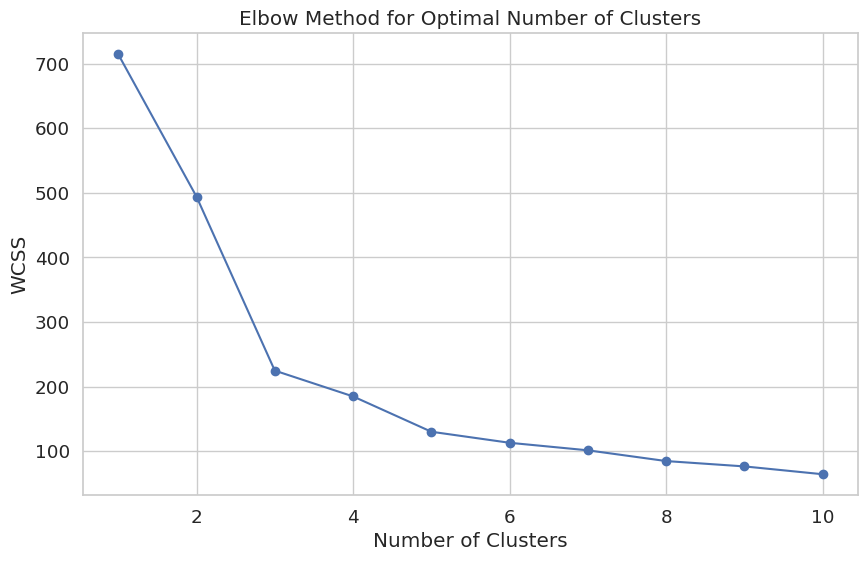

For n_clusters=2, the average silhouette score is 0.3730405478843409
For n_clusters=3, the average silhouette score is 0.5196783171041736
For n_clusters=4, the average silhouette score is 0.41126184484774786
For n_clusters=5, the average silhouette score is 0.4554886574687986
For n_clusters=6, the average silhouette score is 0.4346629182730083
For n_clusters=7, the average silhouette score is 0.406534125011209
For n_clusters=8, the average silhouette score is 0.42151110505277145
For n_clusters=9, the average silhouette score is 0.42484067995605496
For n_clusters=10, the average silhouette score is 0.4100738363044069


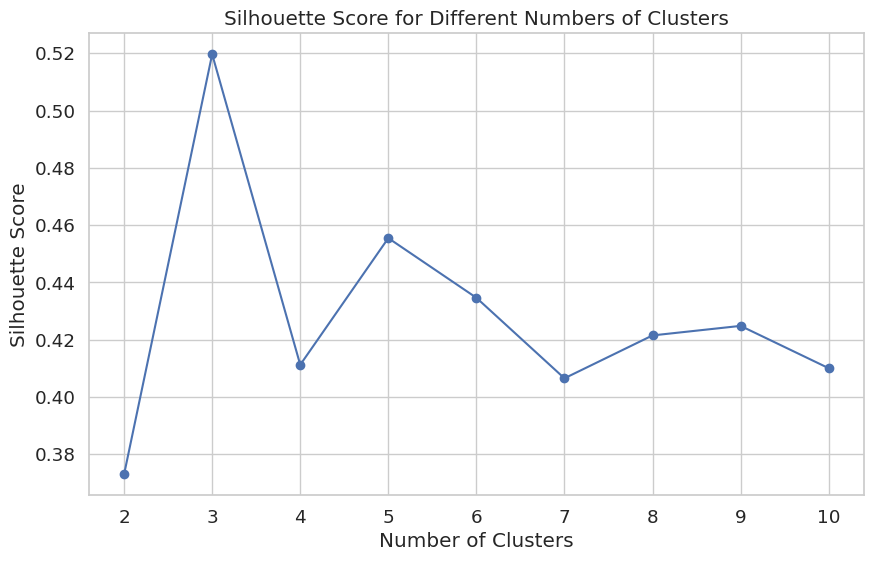

In [6]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_components)
    silhouette_avg = silhouette_score(pca_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={i}, the average silhouette score is {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

### Step 6: Applying K-means Clustering

After determining the optimal number of clusters, we'll apply K-means clustering to the data.


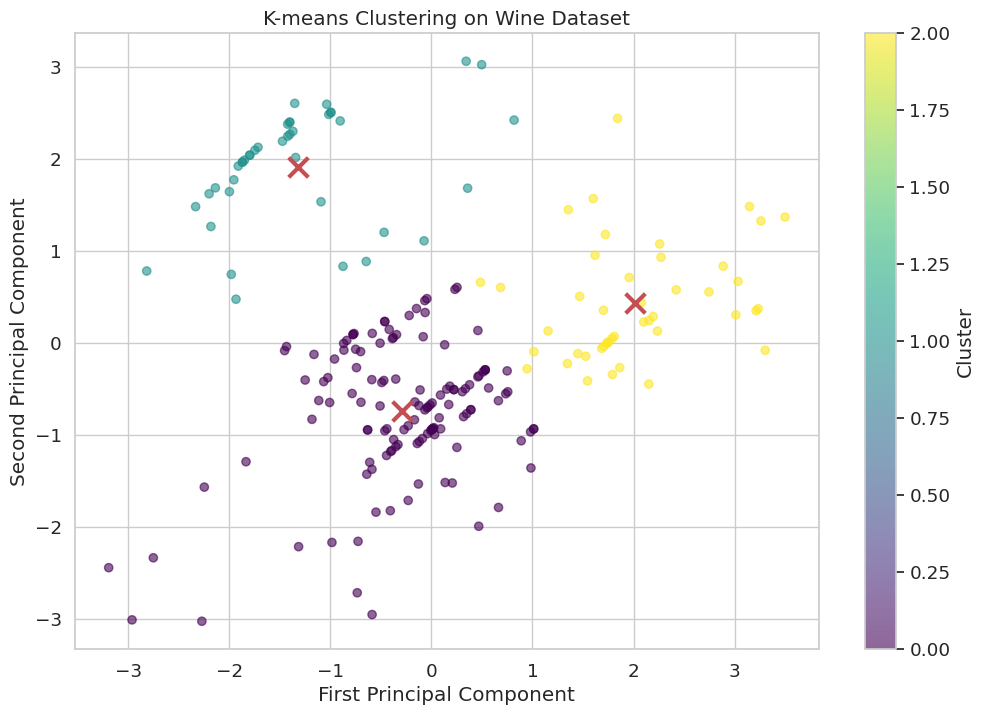

In [7]:
# Apply K-means clustering
optimal_clusters = 3  # Based on Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
wine_df['Cluster'] = kmeans.fit_predict(pca_components)

# Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=wine_df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on Wine Dataset')
plt.colorbar(scatter, label='Cluster')
for i in range(optimal_clusters):
    centroid = kmeans.cluster_centers_[i]
    plt.scatter(centroid[0], centroid[1], marker='x', s=200, linewidths=3, color='r')
plt.show()

### Step 7: Hierarchical Clustering

Next, we'll apply hierarchical clustering to the dataset and visualize the results using a dendrogram.


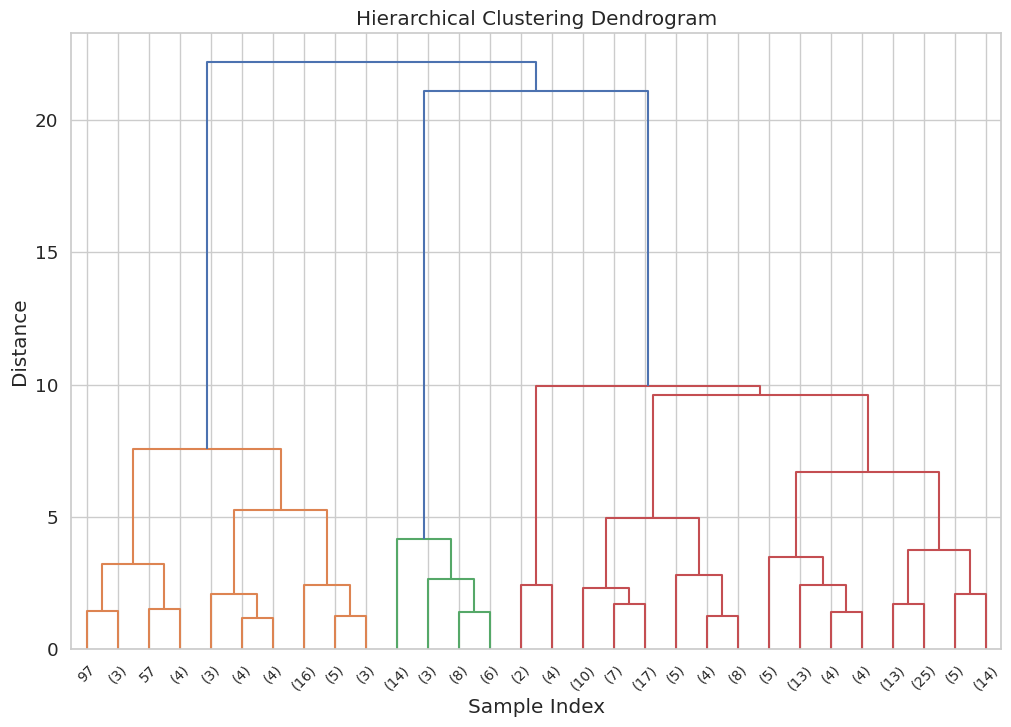

In [8]:
# Perform hierarchical clustering
linked = linkage(pca_components, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Step 8: Cluster Analysis

We'll now analyze the clusters identified by K-means to understand the characteristics of each group. This will help us draw insights about the different types of wines in the dataset.


Cluster Summary:
         Price_Numeric  ABV_Numeric  Type Country                  Style  \
Cluster                                                                    
0                32.92        14.10   Red  France  Savoury & Full Bodied   
1                26.59        14.04   Red   Spain  Savoury & Full Bodied   
2                17.68        12.81  Rosé  France         Delicate & Dry   

               Grape  
Cluster               
0           Grenache  
1        Tempranillo  
2           Grenache  


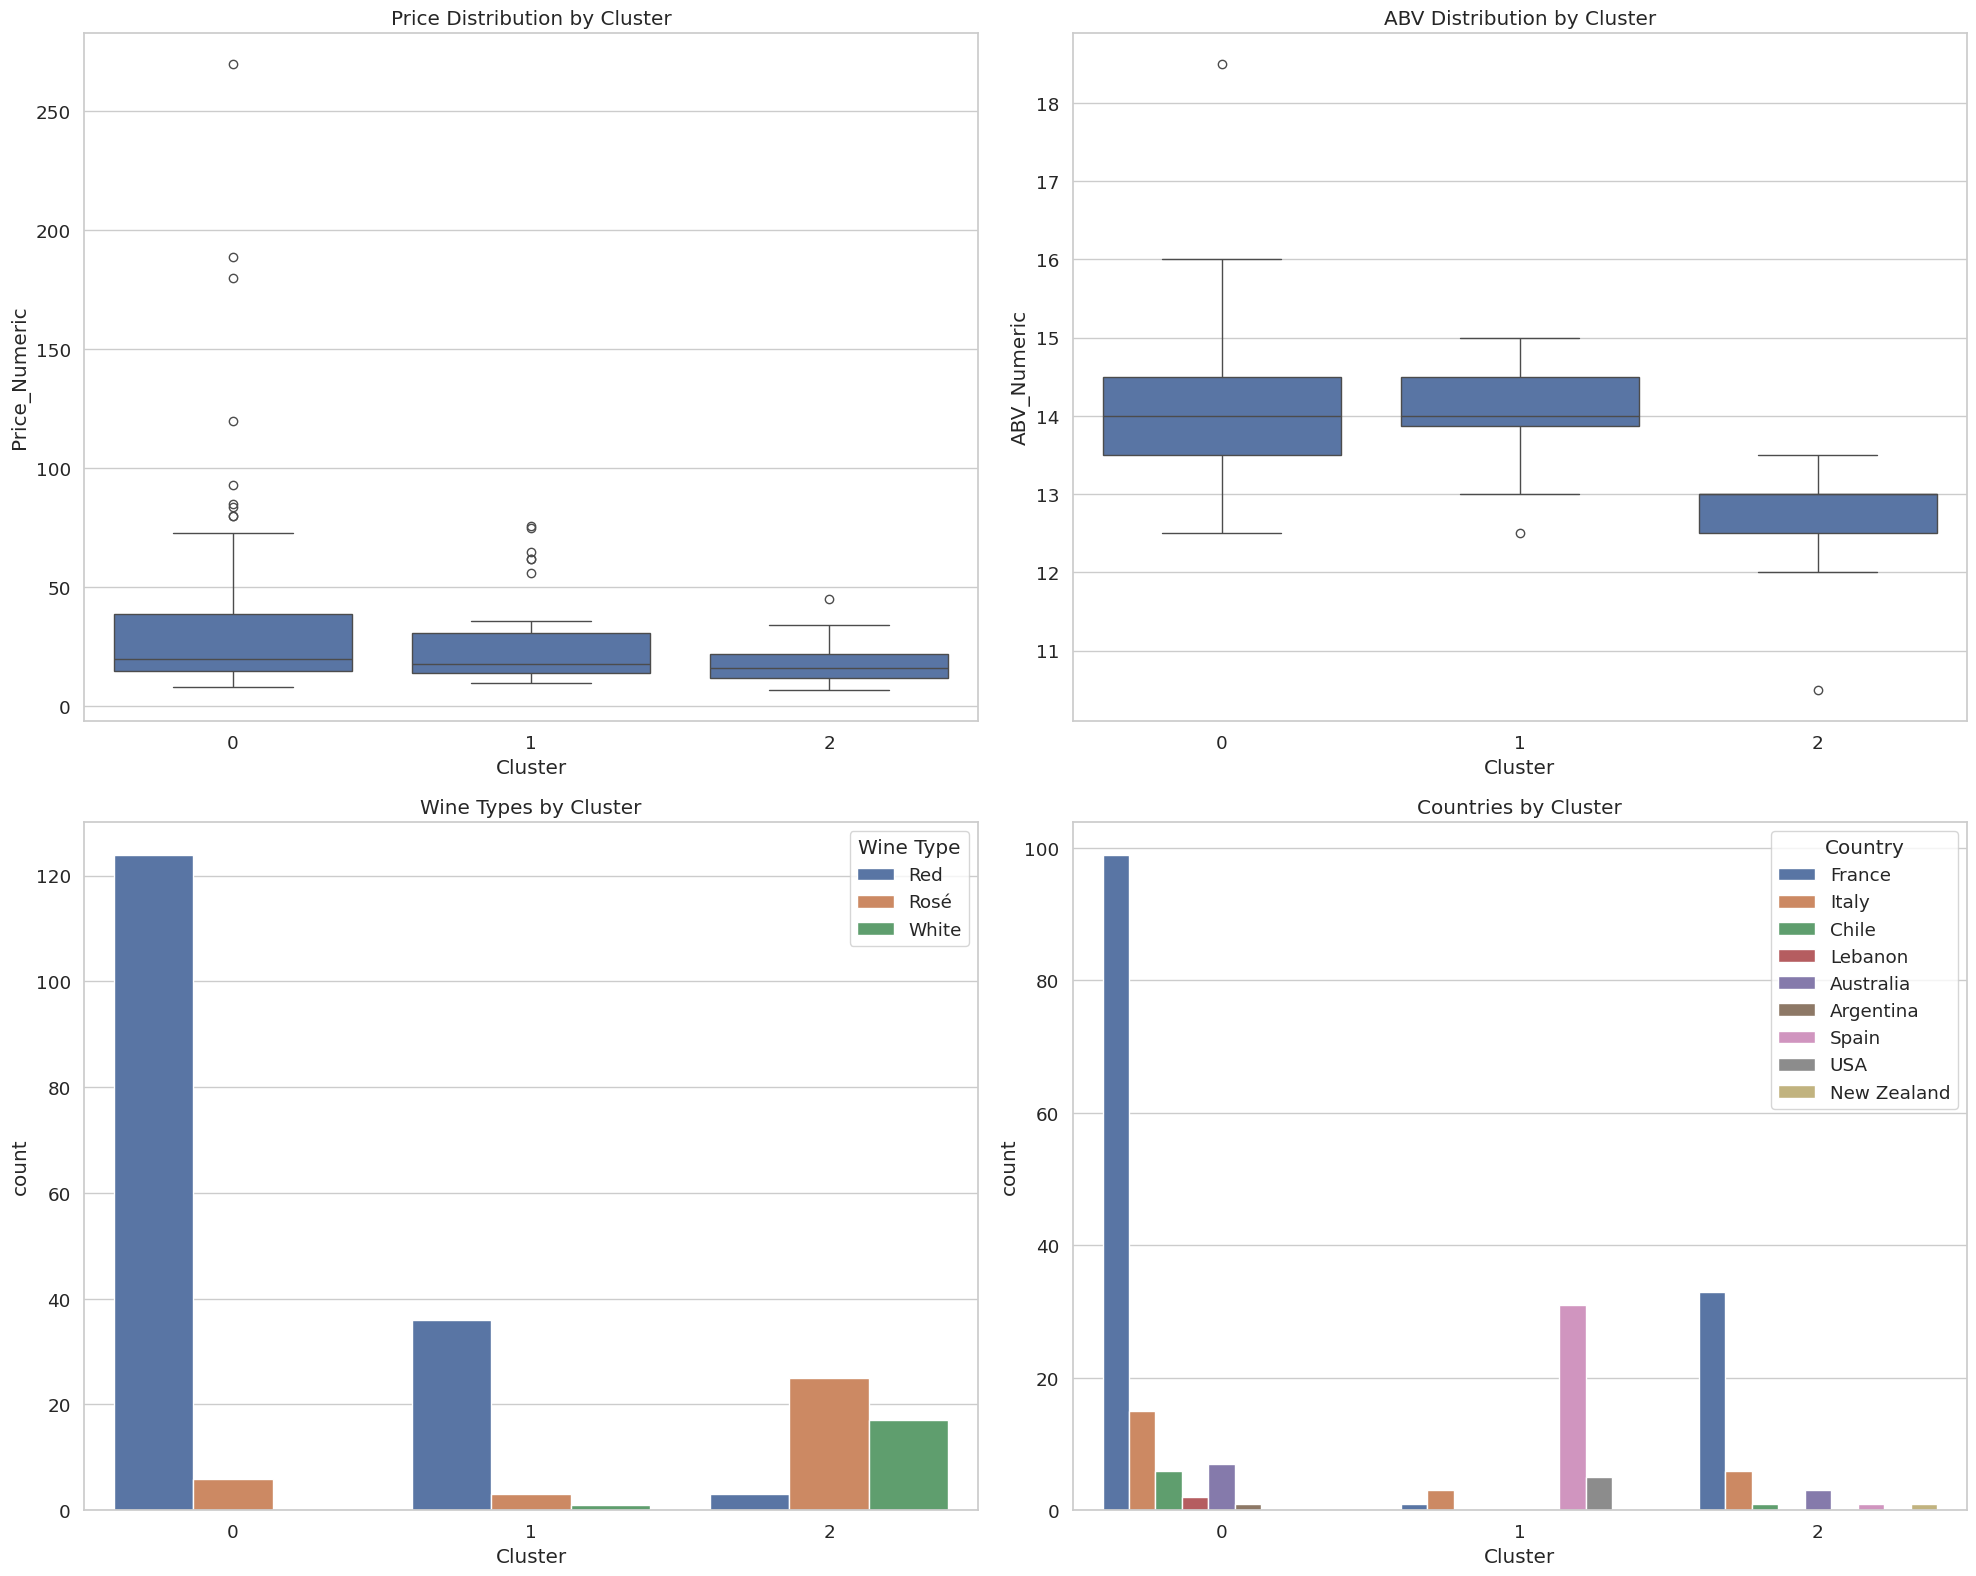

In [9]:
# Analyze cluster characteristics
cluster_summary = wine_df.groupby('Cluster').agg({
    'Price_Numeric': 'mean',
    'ABV_Numeric': 'mean',
    'Type': lambda x: x.value_counts().index[0],
    'Country': lambda x: x.value_counts().index[0],
    'Style': lambda x: x.value_counts().index[0],
    'Grape': lambda x: x.value_counts().index[0]
}).round(2)

print("Cluster Summary:")
print(cluster_summary)

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
sns.boxplot(data=wine_df, x='Cluster', y='Price_Numeric', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by Cluster')
sns.boxplot(data=wine_df, x='Cluster', y='ABV_Numeric', ax=axes[0, 1])
axes[0, 1].set_title('ABV Distribution by Cluster')
sns.countplot(data=wine_df, x='Cluster', hue='Type', ax=axes[1, 0])
axes[1, 0].set_title('Wine Types by Cluster')
axes[1, 0].legend(title='Wine Type')
sns.countplot(data=wine_df, x='Cluster', hue='Country', ax=axes[1, 1])
axes[1, 1].set_title('Countries by Cluster')
axes[1, 1].legend(title='Country')
plt.tight_layout()
plt.show()

### Conclusion

In this analysis, we performed an in-depth exploration and clustering of the wine dataset. Here are the key findings and insights:

1. Data Exploration:
   - The dataset contains a diverse range of wines from various countries, with different types (red, white, rosé) and styles.
   - There are varying levels of missing data across features, which we addressed through careful preprocessing.
   - We observed relationships between price, ABV, and wine type, providing initial insights into market segmentation.

2. Dimensionality Reduction:
   - PCA revealed that the first two principal components capture a significant portion of the variance in the data, allowing for effective visualization and clustering.

3. Clustering:
   - Both K-means and hierarchical clustering methods were applied to segment the wines.
   - The optimal number of clusters was determined to be 3, based on the Elbow method and Silhouette score analysis.

4. Cluster Characteristics:
   - Cluster 0: Mid-range wines with moderate ABV, predominantly red wines from France.
   - Cluster 1: Higher-priced wines with higher ABV, mostly red wines from various countries, often with rich and bold styles.
   - Cluster 2: Lower-priced wines with lower ABV, primarily white wines from regions like Italy and Spain, often with crisp and light styles.

5. Implications:
   - These clusters provide valuable insights for market segmentation, pricing strategies, and targeted marketing campaigns.
   - Retailers can use this information to organize their wine selections and create personalized recommendations for customers.
   - Winemakers might use these insights to identify gaps in the market or refine their product offerings.

6. Future Work:
   - Incorporate more features like vintage, ratings, or flavor profiles for more nuanced clustering.
   - Apply more advanced clustering techniques or ensemble methods for potentially more refined segmentation.
   - Conduct a time series analysis to understand trends and seasonality in wine preferences.

This analysis demonstrates the power of unsupervised learning techniques in uncovering hidden patterns and segments within the wine market. The insights gained can be leveraged by various stakeholders in the wine industry to make data-driven decisions and enhance their business strategies.